In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


def scatterplot(df, tx, ty):
    """Generates scatterplot with line of best fit"""
    title = ty+" vs. "+tx
    plot = df.plot(kind='scatter', figsize=(10, 5), title=title, x=tx, y=ty)
    plot.set_xlabel(tx)
    plot.set_ylabel(ty)
    
    # Uncomment the two lines below and make appropriate edits to label a particular team in a graph
    #team_lbl = df.loc[df['Team'] == 'frc4308']
    #plot.annotate('frc4308', (team_lbl[tx], team_lbl[ty]), textcoords='offset points', xytext=(0, 5), ha='center')
    # Make sure the team is in the dataframe/csv, of course
    
    x = df[tx]
    y = df[ty]
    bm = np.polynomial.polynomial.Polynomial.fit(x, y, 1)
    b, m = bm.convert().coef
    linestr = 'y = '+str(m)+'x + '+str(b)
    plot.plot(x, m*x+b)
    corr_mat = np.corrcoef(x, y)
    r2 = (corr_mat[0, 1])**2
    
    print(linestr)
    print("R^2 = " + str(r2))

In [2]:
df = pd.read_csv('2020ont_team_data.csv')

# Making a ranked dataframe. 
ranked_df = df.sort_values(by=['District Points'], ascending=False)
ranked_df = ranked_df.reset_index()
ranked_df['Rank'] = ranked_df['District Points'].rank(method='max', ascending=False) 
# While FRC uses tiebreakers, they are not implemented at this time
ranked_df

,index,Team,District Points,Alliance Points,Elimination Points,Qualification Points,Award Points,Qualification Win %,Top Qualification Rank,Top Alliance Seed,Top Alliance Pick,Playoff Level,Top Ranking Score,Top Cumulative Auto,Top Cumulative Endgame,Top Cumulative Teleop,Rank
0,1,frc865,78,16,30,22,10,0.833333,1,1.0,0.0,1.0,2.08,406.0,645.0,345.0,1.0
1,2,frc3683,76,15,30,21,10,0.916667,2,2.0,0.0,1.0,2.16,363.0,465.0,518.0,2.0
2,3,frc188,73,16,30,22,5,0.916667,1,1.0,0.0,1.0,2.16,514.0,585.0,510.0,3.0
3,4,frc2200,72,16,30,21,5,0.750000,2,1.0,1.0,1.0,1.91,398.0,650.0,597.0,5.0
4,5,frc1325,72,16,30,21,5,0.750000,2,1.0,1.0,1.0,2.00,380.0,675.0,329.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,83,frc5408,7,0,0,7,0,0.416667,26,0.0,0.0,0.0,0.91,303.0,365.0,198.0,83.0
83,84,frc3571,6,0,0,6,0,0.250000,27,0.0,0.0,0.0,0.50,298.0,245.0,145.0,85.0
84,76,frc7690,6,0,0,6,0,0.333333,26,0.0,0.0,0.0,0.66,233.0,260.0,148.0,85.0
85,85,frc6514,4,0,0,4,0,0.250000,36,0.0,0.0,0.0,0.58,263.0,350.0,179.0,87.0


## District Points Make-Up

Recall the Qual/Dist % vs. Rank graph from Part 1-3. I felt this was a subtopic worth exploring in more contexts.

y = 0.7844222357578323x + 18.963834469332383
R^2 = 0.6747812939248843
Mean: 54.100540822760834%
Median: 50.0%


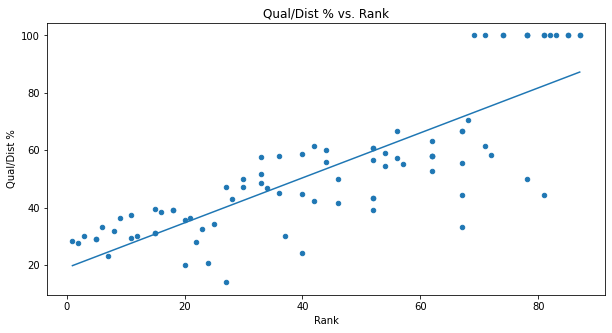

In [3]:
ranked_df['Qual/Dist %'] = 100 * ranked_df['Qualification Points'] / ranked_df['District Points']
scatterplot(ranked_df, 'Rank', 'Qual/Dist %')
print('Mean: ' + str(ranked_df['Qual/Dist %'].mean()) + '%')
print('Median: ' + str(ranked_df['Qual/Dist %'].median()) + '%')

y = -0.2587639415743111x + 34.32138666422982
R^2 = 0.18088518159097472
Mean: 22.730546660608095%
Median: 27.272727272727273%


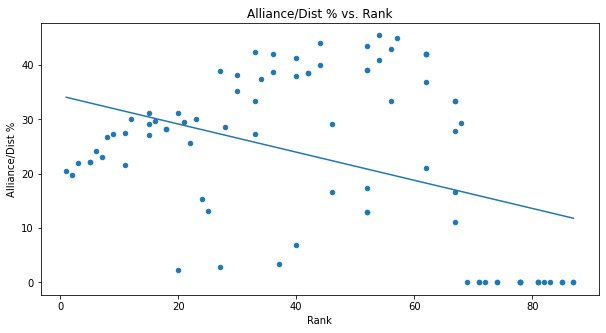

In [4]:
ranked_df['Alliance/Dist %'] = 100 * ranked_df['Alliance Points'] / ranked_df['District Points']
scatterplot(ranked_df, 'Rank', 'Alliance/Dist %')
print('Mean: ' + str(ranked_df['Alliance/Dist %'].mean()) + '%')
print('Median: ' + str(ranked_df['Alliance/Dist %'].median()) + '%')

No linear correlation at all, instead, its vaguely bell curve shaped. It's not actually that teams fall into a normal distribution here (though it is worth looking into how teams do fall into a normal distribution down the line), but rather how alliance selection tends to play out. Being a team captain or a first pick nets a team between 8-16 points. At the mid-ranks, teams typically get 10-20 qualification points. Since the top teams at an event are likely to pick amongst themselves first, the doors are open for teams to grab a similar amount of points in alliance selection and qualification. This falls off quickly at the lower end because teams that perform poorly receive little to no points compared to what they got through qualification. At the front end, the top teams can get a sizable amount of points through qualification, playoffs and awards, which adds up to dwarf the amount of points earned through alliance selection. This data still shows that alliance selection awards a large amount of district points and teams should have a strategy for how they want to approach it.

y = -0.4786121005473285x + 36.17351938827959
R^2 = 0.3275532773995495
Mean: 14.734998056866495%
Median: 0.0%


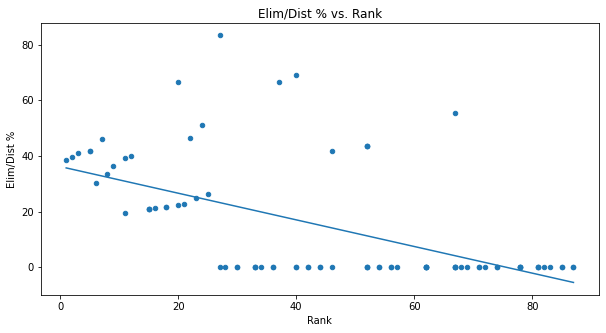

In [6]:
ranked_df['Elim/Dist %'] = 100 * ranked_df['Elimination Points'] / ranked_df['District Points']
scatterplot(ranked_df, 'Rank', 'Elim/Dist %')
print('Mean: ' + str(ranked_df['Elim/Dist %'].mean()) + '%')
print('Median: ' + str(ranked_df['Elim/Dist %'].median()) + '%')

Points awarded in playoffs possibly contribute the most for teams that make it far. A team with elimination points accounting for 80% of their total is no surpise when 30 points are typically awarded for winning. The first alliances will pick among otherwise low ranked teams, thus teams will try to target this area of the ranks. It can be a high risk-high reward strategy however, so take caution. Making it through one or two rounds of playoffs is great as well. The 3 non-zero levels in this graph represent the teams that made it through 1, 2 or 3 rounds of eliminations. Almost all teams that won one playoff match made it into the top third of in rank.

y = -0.04704619363619309x + 10.54125947815819
R^2 = 0.01003308844751735
Mean: 8.43391445976458%
Median: 0.0%


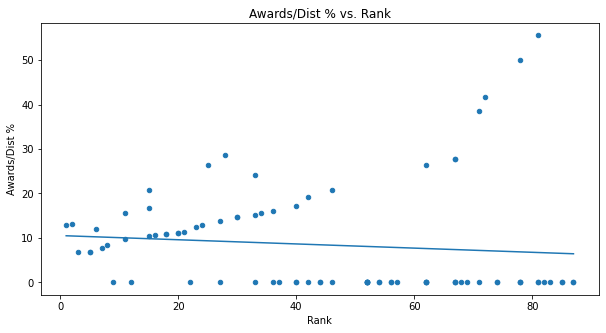

In [8]:
ranked_df['Awards/Dist %'] = 100 * ranked_df['Award Points'] / ranked_df['District Points']
scatterplot(ranked_df, 'Rank', 'Awards/Dist %')
print('Mean: ' + str(ranked_df['Awards/Dist %'].mean()) + '%')
print('Median: ' + str(ranked_df['Awards/Dist %'].median()) + '%')

Award Points contribute little except for teams that aren't getting many points otherwise. Awards are always a thing good thing for a team, but teams should focus on their robot and doing their best anyhow.

<AxesSubplot:xlabel='Rank Range'>

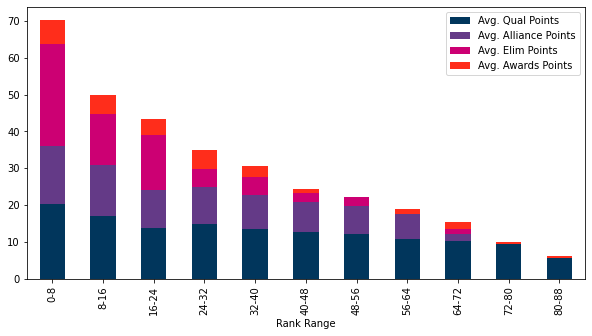

In [29]:
dp_df = pd.DataFrame(columns=['Rank Range', 'Avg. Qual Points', 'Avg. Alliance Points', 'Avg. Elim Points', 'Avg. Awards Points'])

for i in range(0, len(ranked_df.index), 8):
    avg_qp = ranked_df['Qualification Points'][i:i+8].mean()
    avg_ap = ranked_df['Alliance Points'][i:i+8].mean()
    avg_ep = ranked_df['Elimination Points'][i:i+8].mean()
    avg_awp = ranked_df['Award Points'][i:i+8].mean()
    lbl = str(i) + '-' + str(i+8)
    dp_df = dp_df.append(pd.Series([lbl, avg_qp, avg_ap, avg_ep, avg_awp], index=dp_df.columns), ignore_index=True)

dp_df = dp_df.set_index('Rank Range')
colors = ["#01365c","#643a87", "#cc0073", "#ff2d1b"]
dp_df.plot.bar(stacked=True, color=colors, figsize=(10, 5))

Here it is abundantly clear that Elimination Points is the biggest difference maker when it comes to District Points. Qualification Points remains relatively the same among these groups, so does Alliance Points. However, the lead the top 8 has is almost entirely from Elimination Points. The difference between the top 16-24 group and the top 24-32 and top 32-40 groups appears to almost entirely be from Elimination Points as well. This is critical as since about the top 40% (80 teams if the season wasn't cut short), which would be the top 32 here, get to go to the District Championships. Therefore, teams must show off what they can do in the qualification round so they can prove themselves worthy of a deep run in the playoffs.

---

## Game Points Make Up

In [34]:
ranked_df['Top Game Points'] = ranked_df['Top Cumulative Auto'] + ranked_df['Top Cumulative Endgame'] + ranked_df['Top Cumulative Teleop']
gp_df = ranked_df[['Team', 'Rank', 'Top Cumulative Auto', 'Top Cumulative Teleop', 'Top Cumulative Endgame', 'Top Game Points']]
gp_df

,Team,Rank,Top Cumulative Auto,Top Cumulative Teleop,Top Cumulative Endgame,Top Game Points
0,frc865,1.0,406.0,345.0,645.0,1396.0
1,frc3683,2.0,363.0,518.0,465.0,1346.0
2,frc188,3.0,514.0,510.0,585.0,1609.0
3,frc2200,5.0,398.0,597.0,650.0,1645.0
4,frc1325,5.0,380.0,329.0,675.0,1384.0
...,...,...,...,...,...,...
82,frc5408,83.0,303.0,198.0,365.0,866.0
83,frc3571,85.0,298.0,145.0,245.0,688.0
84,frc7690,85.0,233.0,148.0,260.0,641.0
85,frc6514,87.0,263.0,179.0,350.0,792.0


y = 0.04439664615301022x + 31.92083476082603
R^2 = 0.06289017896161693
Mean: 33.90949832471431%
Median: 33.29775880469584%


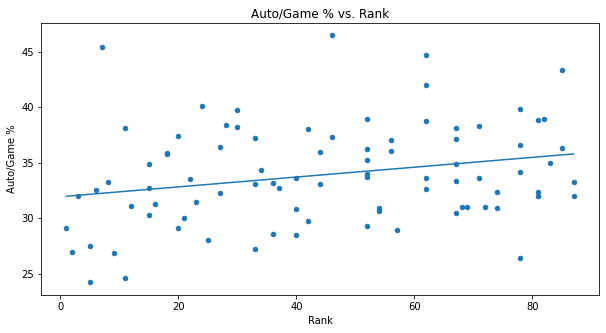

In [36]:
ranked_df['Auto/Game %'] = 100 * ranked_df['Top Cumulative Auto'] / ranked_df['Top Game Points']
scatterplot(ranked_df, 'Rank', 'Auto/Game %')
print('Mean: ' + str(ranked_df['Auto/Game %'].mean()) + '%')
print('Median: ' + str(ranked_df['Auto/Game %'].median()) + '%')

y = -0.06196410044433059x + 28.46963234362663
R^2 = 0.10095761775923805
Mean: 25.694067982344368%
Median: 24.857685009487668%


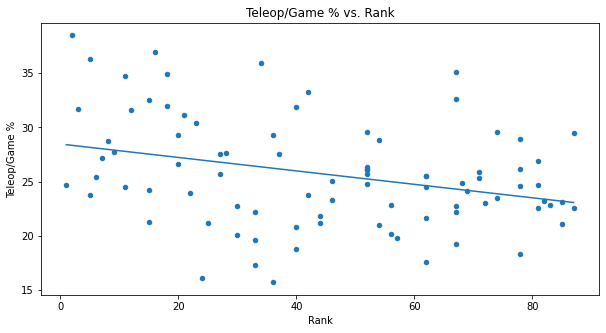

In [37]:
ranked_df['Teleop/Game %'] = 100 * ranked_df['Top Cumulative Teleop'] / ranked_df['Top Game Points']
scatterplot(ranked_df, 'Rank', 'Teleop/Game %')
print('Mean: ' + str(ranked_df['Teleop/Game %'].mean()) + '%')
print('Median: ' + str(ranked_df['Teleop/Game %'].median()) + '%')

y = 0.017567454291319645x + 39.609532895547346
R^2 = 0.006190879469675038
Mean: 40.39643369294131%
Median: 40.524433849821214%


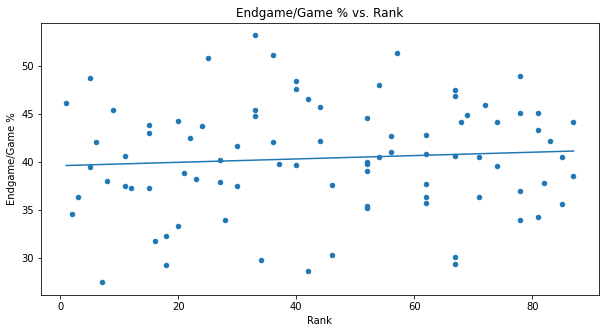

In [38]:
ranked_df['Endgame/Game %'] = 100 * ranked_df['Top Cumulative Endgame'] / ranked_df['Top Game Points']
scatterplot(ranked_df, 'Rank', 'Endgame/Game %')
print('Mean: ' + str(ranked_df['Endgame/Game %'].mean()) + '%')
print('Median: ' + str(ranked_df['Endgame/Game %'].median()) + '%')

None of these graphs show correlation at all. Teams appear to be all over the place with their points breakdown, once again confirming that every team, no matter what level, has their own individual strengths and weaknesses. The graph below is the breakdown for all scored teams:

<AxesSubplot:>

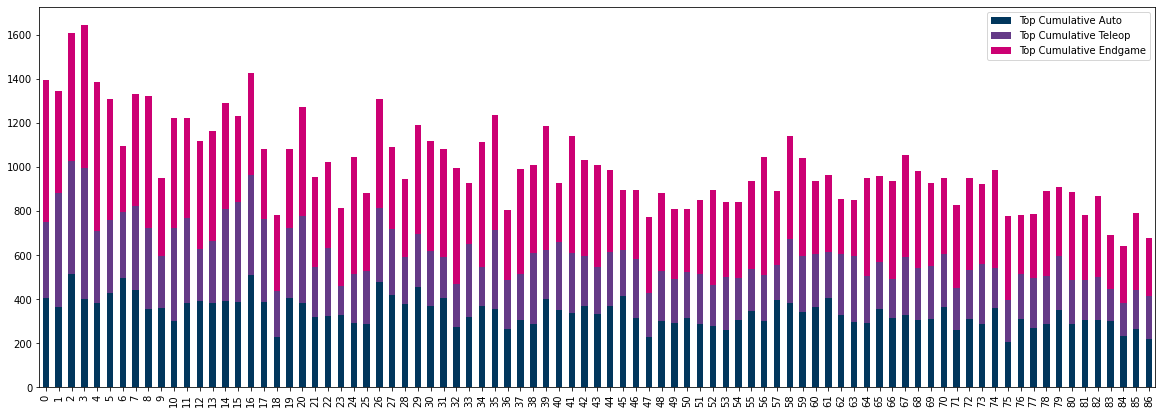

In [43]:
colors = ["#01365c","#643a87", "#cc0073", "#ff2d1b"]
gp_df[['Top Cumulative Auto', 'Top Cumulative Teleop', 'Top Cumulative Endgame']].plot.bar(stacked=True, color=colors, figsize=(20, 7))

---

That's it for Part 1 for now! Thank you for reading. Part 2 coming soon, maybe.